In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Los propósitos de este código son calcular y graficar la dependencia de las diferentes formas funcionales de mu 
respecto al radio y, calcular y graficar las aceleraciones newtoniana y mondianas para un bulbo galáctico junto con
un disco galáctico, por lo tanto, los perfiles de potencial que serán utilizados son el de Hernquist y el de disco
exponencial
'''

'\nLos propósitos de este código son calcular y graficar la dependencia de las diferentes formas funcionales de mu \nrespecto al radio y, calcular y graficar las aceleraciones newtoniana y mondianas para un bulbo galáctico junto con\nun disco galáctico, por lo tanto, los perfiles de potencial que serán utilizados son el de Hernquist y el de disco\nexponencial\n'

In [3]:
## Creamos el vector r [1 kpc], desde 0 hasta 50 con paso de 0.01

r = np.arange(0.001, 50.1, 0.01)  ## Unidad de referencia de longitud 1kpc

## Definamos las constantes

M_b = 1.0 ## 10^10 masas solares. Masa del bulbo de la Vía Láctea. Unidad de referencia de masa: 10^10 masas solares

G = 430007.1  ## Unidad de referencia de tiempo 1.1Gyr

a_0 = 4679.4 ## [kpc/Gyr^2]

b = 2.0 ## escala característica del bulbo

In [4]:
## Definimos las funciones de la velocidad circular del disco al cuadrado y la velocidad circular del bulbo al
## cuadrado

from scipy.special import i0, i1, k0, k1

def vel_cir_disco_cuadrado(M_d, R_d, r):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    return vel_cir_disco_cuadrado

def vel_cir_bulbo_cuadrado(M_b, b, r):
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+b)*(r+b))
    return vel_cir_bulbo_cuadrado

## Definimos las velocidades circulares del disco y del bulbo

def vel_cir_disco(vel_cir_disco_cuadrado):
    vel_cir_disco = np.sqrt(vel_cir_disco_cuadrado)
    return vel_cir_disco

def vel_cir_bulbo(vel_cir_bulbo_cuadrado):
    vel_cir_bulbo = np.sqrt(vel_cir_bulbo_cuadrado)
    return vel_cir_bulbo

## Definimos las funciones de las aceleraciones del bulbo, del disco y la total

def a_disco(vel_cir_disco_cuadrado, r):
    a_disco = vel_cir_disco_cuadrado/r
    return a_disco

def a_bulbo(M_b, b, r):
    a_bulbo = (G*M_b)/((r+b)*(r+b)) 
    return a_bulbo
    
def a_total(a_disco, a_bulbo):
    a_total = a_disco + a_bulbo
    return a_total

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Velocidad Circular Disco Newton')

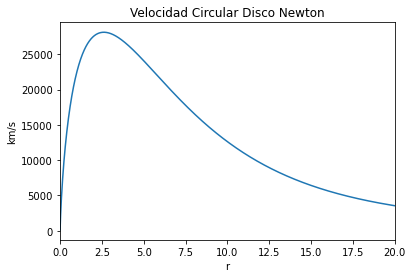

In [5]:
## Graficamos la velocidad circular del disco con los siguientes parámetros

M_d = 5.6   ## Unidades de 10^10 masas solares. Masa del disco de la Vía Láctea

R_d = 3.5   ## Unidades de kpc. Escala radial del disco.

#plt.plot(r, vel_cir_disco(vel_cir_disco_cuadrado(M_d, R_d, r))/262)
plt.plot(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r))
plt.xlim(0,20)
#plt.ylim(10,7000)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Disco Newton')

Text(0.5, 1.0, 'Velocidad Circular Disco Newton \n Disco + Bulbo')

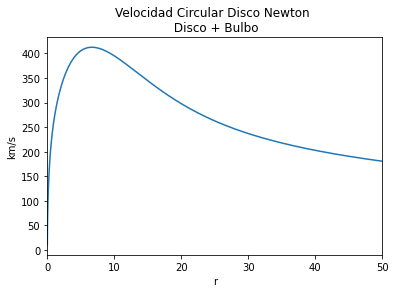

In [6]:
## Graficamos la velocidad circular del disco junto con el bulbo

M_d = 5.6   ## Unidades de 10^10 masas solares. Masa del disco de la Vía Láctea

R_d = 3.5   ## Unidades de kpc. Escala radial del disco.

plt.plot(r, np.sqrt(vel_cir_disco_cuadrado(M_d, R_d, r) + vel_cir_bulbo_cuadrado(M_b, b, r)))
plt.xlim(0, 50)
#plt.ylim(100, 280)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Disco Newton \n Disco + Bulbo')

In [7]:
## Definimos las funciones de las formas funcionales de mu

## R.A.R.: mu(a_N) = (1- exp(-sqrt(a_N/a_0)))^-1

def mu_R(r, a_N):
    mu_R = 1/(1 - np.exp(-np.sqrt(a_N/a_0)))
    return mu_R

## Simple: mu(a_N) = 0.5(1 + sqrt(1 + 4/(a_N/a_0)))

def mu_S (r, a_N):
    mu_S = 0.5*(1 + np.sqrt(1 + 4*a_0/a_N))
    return mu_S

## Standard: mu(a_N) = sqrt(0.5(1+sqrt(1 + (2/(a_N/a_0))^2)))

def mu_Sd(r, a_N):
    mu_Sd = np.sqrt(0.5*(1 +np.sqrt(1 + 4*a_0*a_0/(a_N*a_N))))
    return mu_Sd


Text(0.5, 1.0, 'Formas funcionales $\\mu$(a) respecto al radio \n Para el Disco ')

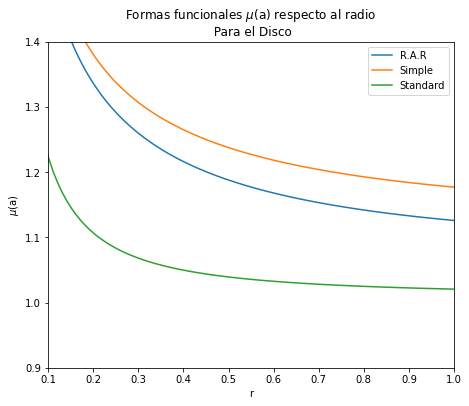

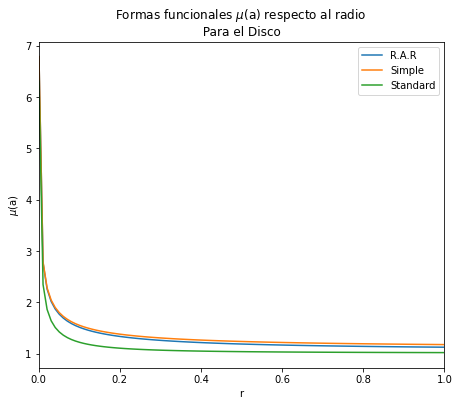

In [8]:
## Graficamos las formas funcionales de mu respecto a r sólo para el disco

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(r, mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='R.A.R')
plt.plot(r, mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Simple')
plt.plot(r, mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Standard')
plt.legend()
plt.xlim(0.1,1)
plt.ylim(0.9, 1.4)
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto al radio \n Para el Disco')

plt.figure(figsize=(16,6))
plt.subplot(122)
plt.xlim(0,1)
plt.plot(r, mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='R.A.R')
plt.plot(r, mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Simple')
plt.plot(r, mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Standard')
plt.legend()
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto al radio \n Para el Disco ')


Text(0.5, 1.0, 'Formas funcionales $\\mu$(a) respecto a la aceleración \n Para el Disco')

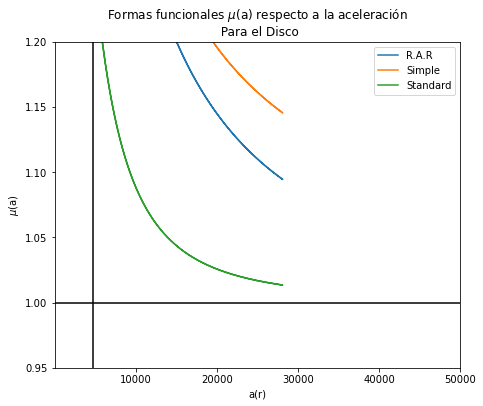

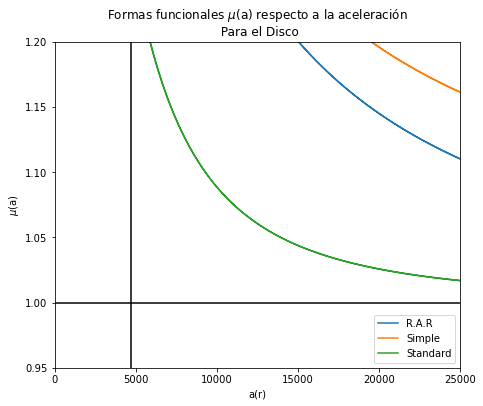

In [9]:
## Graficamos las formas funcionales de mu respecto a la aceleración newtoniana sólo para el disco

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), 
         label='R.A.R')
plt.plot(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), 
         label='Simple')
plt.plot(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), 
         label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
plt.xlim(0.1,50000)
plt.ylim(0.95, 1.2)
#plt.axhline(1.27, color='brown', linestyle='--')
#plt.axhline(1.58, color='brown', linestyle='--')
#plt.axhline(1.62, color='brown', linestyle='--')
plt.xlabel('a(r)')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto a la aceleración \n Para el Disco')

plt.figure(figsize=(16,6))
plt.subplot(122)
plt.plot(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), 
         label='R.A.R')
plt.plot(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), 
         label='Simple')
plt.plot(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), 
         label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
#plt.axhline(1.03, color='brown', linestyle='--')
#plt.axhline(1.07, color='brown', linestyle='--')
#plt.axhline(1.003, color='brown', linestyle='--')
plt.ylim(0.95, 1.2)
plt.xlim(0, 25000)
plt.xlabel('a(r)')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto a la aceleración \n Para el Disco')

Text(0.5, 1.0, 'Formas funcionales $\\mu$(a) respecto al radio \n Para Disco + Bulbo')

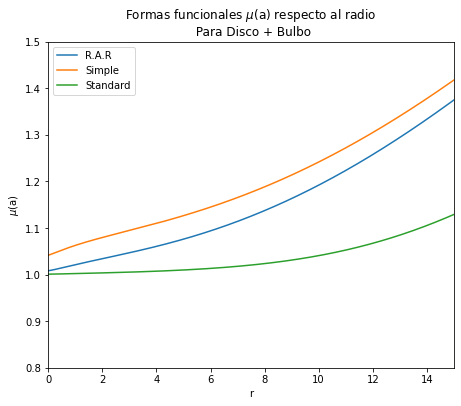

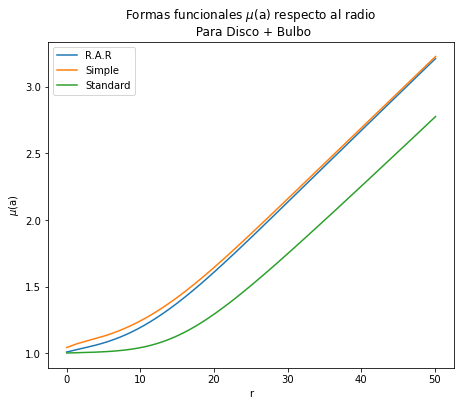

In [10]:
## Graficamos las formas funcionales de mu respecto a r para el disco y el bulbo

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(r, mu_R(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))), label='R.A.R')
plt.plot(r, mu_S(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))), label='Simple')
plt.plot(r, mu_Sd(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))), label='Standard')
plt.legend()
plt.xlim(0.0,15)
plt.ylim(0.8, 1.5)
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto al radio \n Para Disco + Bulbo')



plt.figure(figsize=(16,6))
plt.subplot(122)
plt.plot(r, mu_R(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))), label='R.A.R')
plt.plot(r, mu_S(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))), label='Simple')
plt.plot(r, mu_Sd(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))), label='Standard')
plt.legend()
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto al radio \n Para Disco + Bulbo')


Text(0.5, 1.0, 'Formas funcionales $\\mu$(a) respecto a la aceleración \n Para Disco + Bulbo')

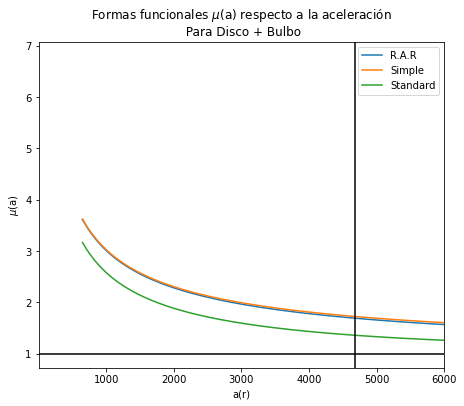

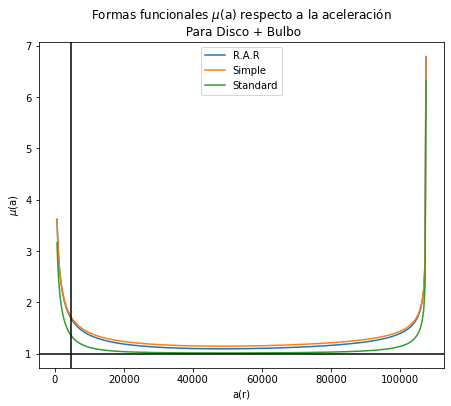

In [11]:
## Graficamos las formas funcionales de mu respecto a la aceleración newtoniana total para el disco y el bulbo

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r)), 
         mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='R.A.R')
plt.plot(a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r)), 
         mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Simple')
plt.plot(a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r)),
         mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
plt.xlim(0.1,6000)
#plt.ylim(1, 2.5)
plt.xlabel('a(r)')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto a la aceleración \n Para Disco + Bulbo')



plt.figure(figsize=(16,6))
plt.subplot(122)
plt.plot(a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r)), 
         mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='R.A.R')
plt.plot(a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r)), 
         mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Simple')
plt.plot(a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r)), 
         mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)), label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
plt.xlabel('a(r)')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto a la aceleración \n Para Disco + Bulbo')


Text(0.5, 1.0, 'Velocidad Circular \n Disco + Bulbo')

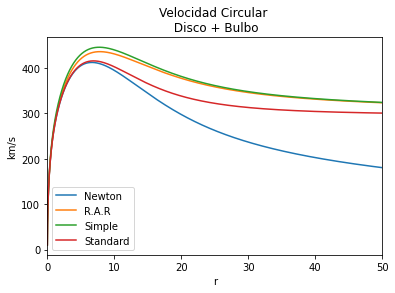

In [12]:
## Graficamos las velocidades circulares de Newton y mondianas, para ello usaremos

## v_N^2 = v_d^2 + v_b^2                Velocidad circular en el esquema de Newton
## v_M^2 = mu (v_d^2 + v_b^2)           Velocidad circular en el esquema de Mond

vel_cir_N = np.sqrt(vel_cir_disco_cuadrado(M_d, R_d, r) + vel_cir_bulbo_cuadrado(M_b, b, r))  ## VC Newton

vel_cir_R = np.sqrt(mu_R(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))))* vel_cir_N

vel_cir_S = np.sqrt(mu_S(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))))* vel_cir_N

vel_cir_Sd= np.sqrt(mu_Sd(r, a_total(a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b, r))))*vel_cir_N

plt.plot(r, vel_cir_N, label='Newton')
plt.plot(r, vel_cir_R, label='R.A.R')
plt.plot(r, vel_cir_S, label='Simple')
plt.plot(r, vel_cir_Sd, label='Standard')
plt.legend()
plt.xlim(0, 50)
#plt.ylim(100, 320)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular \n Disco + Bulbo')



Text(0.5, 1.0, 'Velocidad Circular \n Disco + Bulbo')

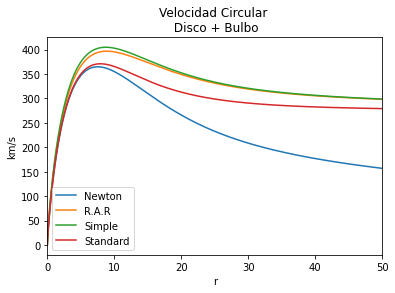

In [13]:
## Graficamos las velocidades circulares de Newton y mondianas, para el disco

## v_N^2 = v_d^2 + v_b^2                Velocidad circular en el esquema de Newton
## v_M^2 = mu (v_d^2 + v_b^2)           Velocidad circular en el esquema de Mond

vel_cir_N = np.sqrt(vel_cir_disco_cuadrado(M_d, R_d, r))  ## VC Newton

vel_cir_R = np.sqrt(mu_R(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)))* vel_cir_N

vel_cir_S = np.sqrt(mu_S(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)))* vel_cir_N

vel_cir_Sd= np.sqrt(mu_Sd(r, a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r)))*vel_cir_N

plt.plot(r, vel_cir_N, label='Newton')
plt.plot(r, vel_cir_R, label='R.A.R')
plt.plot(r, vel_cir_S, label='Simple')
plt.plot(r, vel_cir_Sd, label='Standard')
plt.legend()
plt.xlim(0, 50)
#plt.ylim(100, 320)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular \n Disco + Bulbo')

In [14]:
## Hacemos la lectura de los datos de la galaxia NGC2403

import pandas as pd

datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')

/tmp/ipykernel_41270/931135393.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_41270/931135393.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')


In [15]:
## Leemos los primeros cinco datos. Verificamos que el radio no inicia en 0 pues las funciones modificadas de Bessel
## divergen

datos.head()

,R(kpc),V(km/s)
0,0.05,53.95123
1,0.10,60.44677
2,0.15,66.02752
3,0.20,69.54928
4,0.25,71.69053


In [16]:
## Verificamos la cantidad de datos que tenemos y si alguno de ellos es nulo. 

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R(kpc)   394 non-null    float64
 1   V(km/s)  394 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [17]:
## Creamos los arrays con nuestras x e y, es decir, el radio y la velocidad respectivamente

x = np.array(datos['R(kpc)'])
y = np.array(datos['V(km/s)'])

Text(0.5, 1.0, 'Velocidad Circular NGC 2403')

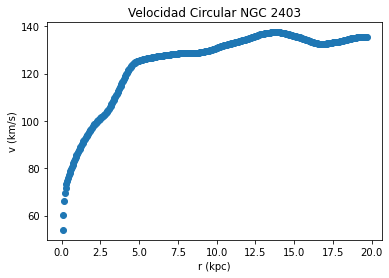

In [18]:
## Ploteamos la velocidad en función del radio

plt.scatter(x, y)
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.title('Velocidad Circular NGC 2403')

In [19]:
## Función a optimizar

def vel_cir_DiscoBulbo(r, M_b, R_b, M_d, R_d):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    vel_cir_DiscoBulbo = np.sqrt(vel_cir_disco_cuadrado + vel_cir_bulbo_cuadrado)
    
    return vel_cir_DiscoBulbo

In [20]:
## Hacemos una prueba para verificar que el método esté funcionando correctamente, para ello, daremos los siguientes
## valores a los parámetros: M_b = 3, b_b = 3, M_d = 2 y R_d = 2.

## Creamos los valores de la velocidad dado un vector r, en este caso utilizamos el r que está en la primera parte
## del código

y_prueba = vel_cir_DiscoBulbo(r, 3, 3, 2, 2)

In [21]:
## Importamos la librería

from scipy.optimize import curve_fit

In [22]:
## Extraemos la información que nos da el método curve fit. 

params, cov = curve_fit(vel_cir_DiscoBulbo, r, y_prueba, bounds=(1, 4), method='trf')

In [23]:
## Como vemos, los parámetros calculados por el método son bastante cercanos cuando no iguales a los parámetros que
## hemos fijado, por lo tanto, podemos usar el método 

params

array([3., 3., 2., 2.])

In [24]:
#cov

In [25]:
## Usamos el método curve fit para fitear los datos de la galaxia NGC2403

params_prueba, cov_prueba = curve_fit(vel_cir_DiscoBulbo, x, y, method='trf', 
                                      bounds=(0, 10))

In [26]:
## Vemos cuál es el valor de los parámetros calculados por el método.

## El valor de los parámetros es, en realidad:
## M_b = 
## R_b = 1.6 kpc
## M_d = 
## R_d = 2.1 kpc
## Masa dinámica = 10^10

params_prueba

array([0.09226724, 1.34757991, 1.29074145, 6.60071215])

In [27]:
cov_prueba

array([[2.77792620e-05, 3.31996342e-04, 1.95580726e-05, 3.64385249e-04],
       [3.31996342e-04, 4.27611389e-03, 1.68491068e-04, 3.97718127e-03],
       [1.95580726e-05, 1.68491068e-04, 2.16781092e-04, 1.05076748e-03],
       [3.64385249e-04, 3.97718127e-03, 1.05076748e-03, 8.30957511e-03]])

In [28]:
y_pred = vel_cir_DiscoBulbo(x, params_prueba[0], np.abs(params_prueba[1]), params_prueba[2], params_prueba[3])

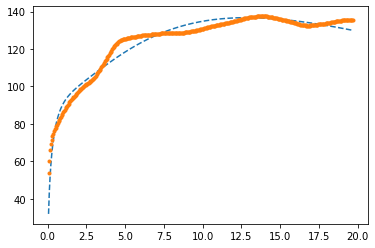

In [29]:
plt.plot(x, y_pred, '--')
plt.plot(x, y, '.')

In [30]:
## Poniendo mayores restricciones a los parámetros, tenemos que

params_prueba, cov_prueba = curve_fit(vel_cir_DiscoBulbo, x, y, method='trf', 
                                      bounds=(0, [M_b < M_d, 2.0, 1, 3.0]))


params_prueba

array([0.04444993, 2.        , 0.71676342, 3.        ])

In [31]:
y_pred2 = vel_cir_DiscoBulbo(x, params_prueba[0], np.abs(params_prueba[1]), params_prueba[2], params_prueba[3])

error_Newton = np.sqrt(np.diag(cov_prueba))

print('Error M_b:', error_Newton[0], '\nError R_b:', error_Newton[1], '\nError M_d:', error_Newton[2], 
      '\nError R_d:', error_Newton[3])

print('M_h=', params_prueba[0], '\nR_h=', params_prueba[1], '\nM_b=', params_prueba[2], '\nM_d=', 
      params_prueba[3])


Error M_b: 0.08868326475866584 
Error R_b: 2.4966785386721604 
Error M_d: 0.09477656318685783 
Error R_d: 0.09799297926046116
M_h= 0.044449928089859606 
R_h= 1.9999999999805307 
M_b= 0.7167634239764653 
M_d= 2.9999999999999996


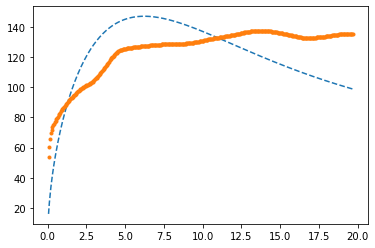

In [32]:
## Como no nos da una buena predicción, utilizaremos otro método de ajuste. 

plt.plot(x, y_pred2, '--')
plt.plot(x, y, '.')

In [33]:
from scipy.optimize import least_squares

In [34]:
def fun_error(params, x, y):
    fun_error = vel_cir_DiscoBulbo(x, *params) - y
    return fun_error

In [35]:
initial_guess = [1.0, 1.0, 1.0, 1.0]

In [36]:
lower_bounds = [0.0, 0.0, 0.0, 0.0]
upper_bounds = [10, 10, 10, 10]

bounds = (lower_bounds, upper_bounds)

resultado = least_squares(fun_error, initial_guess, args=(x, y), bounds=bounds)

In [37]:
resultado.x

array([0.09226558, 1.34755945, 1.29073996, 6.60068903])

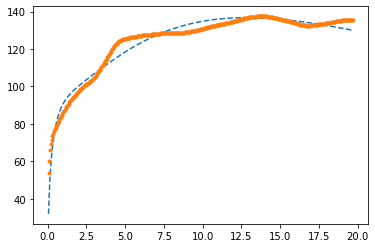

In [38]:
y_pred_LeastSquares = vel_cir_DiscoBulbo(x, resultado.x[0], resultado.x[1], resultado.x[2], resultado.x[3])

plt.plot(x, y_pred_LeastSquares, '--')
plt.plot(x, y, '.')

In [39]:
lower_bounds = [0.0, 0.0, 0.0, 0.0]
upper_bounds = [1, 3, 1, 3]

bounds = (lower_bounds, upper_bounds)

resultado2 = least_squares(fun_error, initial_guess, args=(x, y), bounds=bounds)

In [40]:
resultado2.x

array([0.11476942, 3.        , 0.64186199, 3.        ])

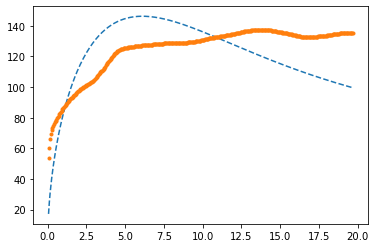

In [41]:
y_pred_LeastSquares2 = vel_cir_DiscoBulbo(x, resultado2.x[0], resultado2.x[1], resultado2.x[2], resultado2.x[3])

plt.plot(x, y_pred_LeastSquares2, '--')
plt.plot(x, y, '.')

In [42]:
## Veamos con Least Squares
from iminuit import Minuit

# Definir la función de error (chi-cuadrado) a minimizar
def chi2(Mb, Rb, Md, Rd):
    return sum((y - vel_cir_DiscoBulbo(x, Mb, Rb, Md, Rd))**2)

# Crear una instancia de Minuit y minimizar el chi-cuadrado
minuit_chi2 = Minuit(chi2,
                Mb=10, Rb=1, Md=10, Rd=2)

minuit_chi2.limits['Mb'] = (0.1,10)
minuit_chi2.limits['Rb'] = (0.1,10)
minuit_chi2.limits['Md'] = (0.1,10)
minuit_chi2.limits['Rd'] = (0.1,10)

In [43]:
minuit_chi2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5191                       │              Nfcn = 517              │
│ EDM = 2.69e-05 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Mb   │ 100.00e-3 │  0.28e-3  │            │            │   0.1   │   10    │       │
│ 1 │ Rb   │   1.440   │   0.005   │            │            │   0.1   │   10    │       │
│ 2 │ Md   │   1.297   │   0.004   │            │            │   0.1   │   10    │       │
│ 3 │ Rd   │   6.703   │   0.017   │            │            │   0.1   │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        Mb        Rb        Md        Rd │
├────┼─────────────────────────────────────────┤
│ Mb │   6.6e-12  -216e-12   -13e-12  -238e-12 │
│ Rb │  -216e-12  2.58e-05 -0.006e-3 -0.034e-3 │
│ Md │   -13e-12 -0.006e-3  1.71e-05  0.068e-3 │
│ Rd │  -238e-12 -0.034e-3  0.068e-3  0.000302 │
└────┴─────────────────────────────────────────┘

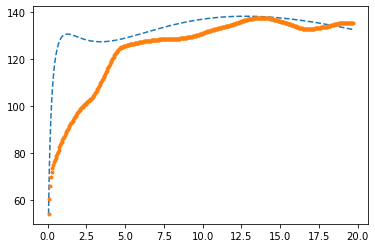

In [44]:
y_pred_Iminuit = vel_cir_DiscoBulbo(x, 0.149, 1, 1.32, 7.259)

plt.plot(x, y_pred_Iminuit, '--')
plt.plot(x, y, '.')

In [45]:
minuit_chi2.limits['Mb'] = (0.1,1)
minuit_chi2.limits['Rb'] = (0.1,3)
minuit_chi2.limits['Md'] = (0.1,1)
minuit_chi2.limits['Rd'] = (0.1,3)

In [46]:
minuit_chi2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.522e+05                  │              Nfcn = 871              │
│ EDM = 4.46e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Mb   │  0.1148   │  0.0012   │            │            │   0.1   │    1    │       │
│ 1 │ Rb   │  3.00000  │  0.00013  │            │            │   0.1   │    3    │       │
│ 2 │ Md   │  0.6419   │  0.0016   │            │            │   0.1   │    1    │       │
│ 3 │ Rd   │ 3.000000  │ 0.000007  │            │            │   0.1   │    3    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        Mb        Rb        Md        Rd │
├────┼─────────────────────────────────────────┤
│ Mb │  1.42e-06  54.5e-15   -1.8e-6  0.81e-15 │
│ Rb │  54.5e-15  3.61e-16 -55.3e-15         0 │
│ Md │   -1.8e-6 -55.3e-15  2.65e-06 -3.00e-15 │
│ Rd │  0.81e-15         0 -3.00e-15  8.69e-17 │
└────┴─────────────────────────────────────────┘

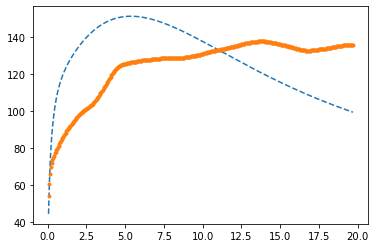

In [47]:
y_pred_Iminuit2 = vel_cir_DiscoBulbo(x, 0.1, 1, 0.631, 3.0)

plt.plot(x, y_pred_Iminuit2, '--')
plt.plot(x, y, '.')

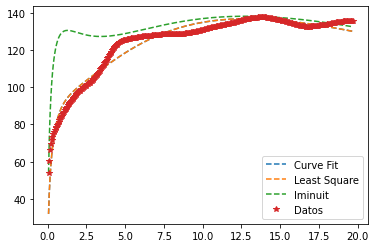

In [48]:
## Límites de 0 a 10

plt.plot(x, y_pred, '--', label='Curve Fit')
plt.plot(x, y_pred_LeastSquares, '--', label='Least Square')
plt.plot(x, y_pred_Iminuit, '--', label='Iminuit')
plt.plot(x, y, '*', label='Datos')
plt.legend()

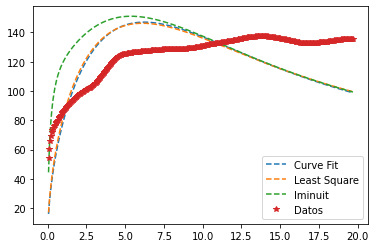

In [49]:
## Límites de 0 a 3 y 10

plt.plot(x, y_pred2, '--', label='Curve Fit')
plt.plot(x, y_pred_LeastSquares2, '--', label='Least Square')
plt.plot(x, y_pred_Iminuit2, '--', label='Iminuit')
plt.plot(x, y, '*', label='Datos')
plt.legend()

In [50]:
## Vemos que nos hemos acercado más con Curve_Fit con los límites adecuados, por lo que en lo sucesivo trabajaremos
## sólo con este método.

Curve_Fit = np.abs(0.14+1.32-0.5)+np.abs(7.3-1.6)+np.abs(7.26-2.1)
Curve_Fit2 = np.abs(0.04+0.72-0.5)+np.abs(1.65-1.6)+np.abs(3-2.1)

Least_Square = np.abs(0.24+1.32-0.5)+np.abs(6.03-1.6)+np.abs(7.26-2.1)
Least_Square2 = np.abs(0.04+0.72-0.5)+np.abs(0.05-1.6)+np.abs(3-2.1)

Iminuit = np.abs(0.15+1.32-0.5)+np.abs(1-1.6)+np.abs(7.26-2.1)
Iminuit2 = np.abs(0.1+0.631-0.5)+np.abs(1-1.6)+np.abs(3-2.1)


print('Curve Fit:', Curve_Fit)
print('Curve Fit2:', Curve_Fit2)
print('Least_Square:', Least_Square)
print('Least_Square2:', Least_Square2)
print('Iminuit:', Iminuit)
print('Iminuit2:', Iminuit2)

Curve Fit: 11.82
Curve Fit2: 1.2099999999999997
Least_Square: 10.65
Least_Square2: 2.71
Iminuit: 6.73
Iminuit2: 1.7309999999999999


Error M_b: 0.0007178315620602694 
Error R_b: 0.01907669966999018 
Error M_d: 0.0014485561041465986 
Error R_d: 0.028755364968635955
M_b= 0.014016902588828938 
R_b= 0.32709798136073154 
M_d= 0.18725655584839462 
R_d= 2.9999999999999996


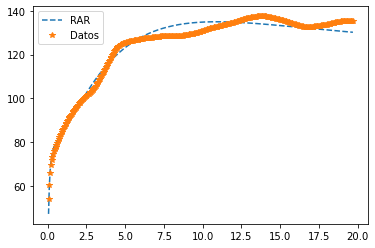

In [57]:
## Veamos con los modelos de Mond

## R.A.R.

def vel_cir_DiscoBulbo_RAR(r, M_b, R_b, M_d, R_d):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    a_total = vel_cir_bulbo_cuadrado/r + vel_cir_disco_cuadrado/r
    
    mu_R = 1/(1 - np.exp(-np.sqrt(a_total/a_0)))
    
    vel_cir_DiscoBulbo_RAR = np.sqrt(mu_R) * np.sqrt(vel_cir_disco_cuadrado + vel_cir_bulbo_cuadrado)    
    
    return vel_cir_DiscoBulbo_RAR

p_inicial = (1.0, 1.0, 1.0, 1.0)

params_RAR, cov_RAR = curve_fit(vel_cir_DiscoBulbo_RAR, x, y, method='trf', p0=p_inicial,
                                      bounds=(0, [M_b < M_d, 2.0, 1, 3.0]))


error_RAR = np.sqrt(np.diag(cov_RAR))

print('Error M_b:', error_RAR[0], '\nError R_b:', error_RAR[1], '\nError M_d:', error_RAR[2], 
      '\nError R_d:', error_RAR[3])


print('M_b=', params_RAR[0], '\nR_b=', params_RAR[1], '\nM_d=', params_RAR[2], '\nR_d=', params_RAR[3])

y_pred_RAR = vel_cir_DiscoBulbo_RAR(x, params_RAR[0], params_RAR[1], params_RAR[2], params_RAR[3])


plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_b: 0.0007065985048669274 
Error R_b: 0.01964327499355177 
Error M_d: 0.0014427986974183194 
Error R_d: 0.02880605841464224
M_b= 0.013416174871932415 
R_b= 0.3285469682307691 
M_d= 0.18696879679258344 
R_d= 2.9999999999999996


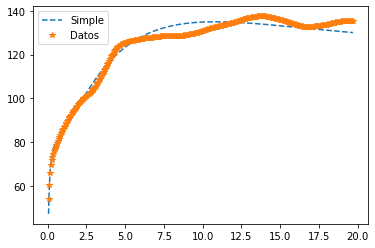

In [52]:
## Simple

def vel_cir_DiscoBulbo_Simple(r, M_b, R_b, M_d, R_d):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    a_total = vel_cir_bulbo_cuadrado/r + vel_cir_disco_cuadrado/r
    
    mu_S = 0.5*(1 + np.sqrt(1 + 4*a_0/a_total))
    
    vel_cir_DiscoBulbo_Simple = np.sqrt(mu_S) * np.sqrt(vel_cir_disco_cuadrado + vel_cir_bulbo_cuadrado)    
    
    return vel_cir_DiscoBulbo_Simple

params_Simple, cov_Simple = curve_fit(vel_cir_DiscoBulbo_Simple, x, y, method='trf', 
                                      bounds=(0, [M_b < M_d, 2.0, 1, 3.0]))

error_Simple = np.sqrt(np.diag(cov_Simple))

print('Error M_b:', error_Simple[0], '\nError R_b:', error_Simple[1], '\nError M_d:', error_Simple[2], 
      '\nError R_d:', error_Simple[3])


print('M_b=', params_Simple[0], '\nR_b=', params_Simple[1], '\nM_d=', params_Simple[2], '\nR_d=', params_Simple[3])

y_pred_Simple = vel_cir_DiscoBulbo_Simple(x, params_Simple[0], params_Simple[1], params_Simple[2], params_Simple[3])


plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_b: 0.0007065985048669274 
Error R_b: 0.01964327499355177 
Error M_d: 0.0014427986974183194 
Error R_d: 0.02880605841464224
M_b= 0.013416174871932415 
R_b= 0.3285469682307691 
M_d= 0.18696879679258344 
R_d= 2.9999999999999996


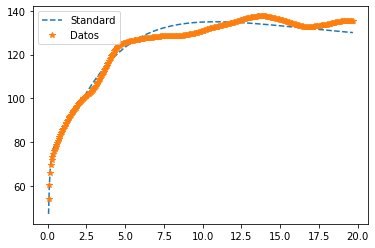

In [53]:
## Standard

def vel_cir_DiscoBulbo_Standard(r, M_b, R_b, M_d, R_d):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    a_total = vel_cir_bulbo_cuadrado/r + vel_cir_disco_cuadrado/r
    
    mu_Sd = 0.5*(1 + np.sqrt(1 + 4*a_0/a_total))
    
    vel_cir_DiscoBulbo_Standard = np.sqrt(mu_Sd) * np.sqrt(vel_cir_disco_cuadrado + vel_cir_bulbo_cuadrado)    
    
    return vel_cir_DiscoBulbo_Standard

params_Standard, cov_Standard = curve_fit(vel_cir_DiscoBulbo_Standard, x, y, method='trf', 
                                      bounds=(0, [M_b < M_d, 2.0, 1, 3.0]))

error_Standard = np.sqrt(np.diag(cov_Standard))

print('Error M_b:', error_Standard[0], '\nError R_b:', error_Standard[1], '\nError M_d:', error_Standard[2], 
      '\nError R_d:', error_Standard[3])



print('M_b=', params_Standard[0], '\nR_b=', params_Standard[1], '\nM_d=', params_Standard[2], '\nR_d=', 
      params_Standard[3])


y_pred_Standard = vel_cir_DiscoBulbo_Standard(x, params_Standard[0], params_Standard[1], params_Standard[2], 
                                          params_Standard[3])


plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()

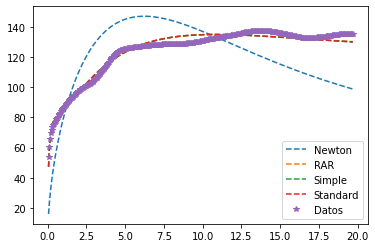

In [54]:
plt.plot(x, y_pred2, '--', label='Newton')
plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()

In [55]:
print('Error \t M_b \t \t \t R_b \t \t \t M_d \t \t \t R_d')
print('Newton \t', error_Newton[0], '\t', error_Newton[1], '\t', error_Newton[2], '\t', error_Newton[3])
print('RAR \t', error_RAR[0], '\t', error_RAR[1], '\t', error_RAR[2], '\t', error_RAR[3])
print('Simple \t', error_Simple[0], '\t', error_Simple[1], '\t', error_Simple[2], '\t', error_Simple[3])
print('Standard', error_Standard[0], '\t', error_Standard[1], '\t', error_Standard[2], '\t', error_Standard[3])

Error 	 M_b 	 	 	 R_b 	 	 	 M_d 	 	 	 R_d
Newton 	 0.08868326475866584 	 2.4966785386721604 	 0.09477656318685783 	 0.09799297926046116
RAR 	 0.0007178315620602694 	 0.01907669966999018 	 0.0014485561041465986 	 0.028755364968635955
Simple 	 0.0007065985048669274 	 0.01964327499355177 	 0.0014427986974183194 	 0.02880605841464224
Standard 0.0007065985048669274 	 0.01964327499355177 	 0.0014427986974183194 	 0.02880605841464224
